<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/211127_Clustering_Techniques/DB_Scan_Clustering_Cory_Randolph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DB Scan Clustering
Cory Randolph

11/27/2021

Goal: Demonstrate DB Scan Clustering



# Load Packages

Import basic packages for visualization

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn
import pandas as pd

In [42]:
!pip install pycaret

import pycaret
from pycaret.utils import enable_colab
enable_colab()

# Clear output for this cell
from IPython.display import clear_output
clear_output()

# DB Scan Overview

Density-Based Spatial Clustering (DB Scan) is different from other methods like K-means becuase it focuses on the local neighborhoods and target densities to form clusters.

# Create Data

Use a sklearn package to create clusters of data. Let's choose 5 clusters for our example.

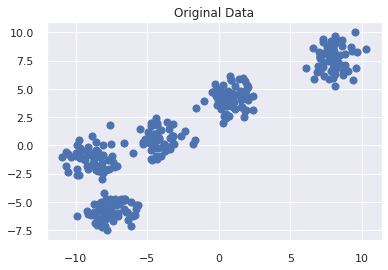

In [43]:
from sklearn.datasets import make_blobs

# Create cluster values in 2 dimensions
X, y_true = make_blobs(n_samples=300, centers=5, n_features = 2,
                       cluster_std=0.9, random_state=3)

# Plot the clusters
plt.title('Original Data')
plt.scatter(X[:, 0], X[:, 1], s=50);

Convert dataset into a Pandas Dataframe for DB Scan to work.


In [44]:
df = pd.DataFrame(X)

df.head(3)

,0,1
0,-2.392265,1.292105
1,0.525134,2.771127
2,-1.007474,3.921971


# DB Scan

## Create DB Scan Model

Apply DB Scan with Pycaret

In [45]:
from pycaret.clustering import *

Create the cluster environment

In [46]:
clust = setup(data = df)

,Description,Value
0,session_id,2607
1,Original Data,"(300, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(300, 2)"
9,CPU Jobs,-1


Create the Model for DB Scan

In [47]:
model = create_model('dbscan', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1249,46.2545,2.28,0,0,0


Plot the model

In [48]:
plot_model(model)

DB Scan did not take in any number of clusters (like k = 5 in the Kmeans example), so it has created 11 clusters for our example. Also clusters with assignment -1 are what it is considering as noise.

# K-Means with pycaret

As a quick reference let's do K-means in pycaret

In [49]:
model = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6972,2628.5985,0.4163,0,0,0


In [50]:
plot_model(model)

Kmeans is well clustered based on the ground truth clusters provided.

Kmeans also comes with other plots to view metrics

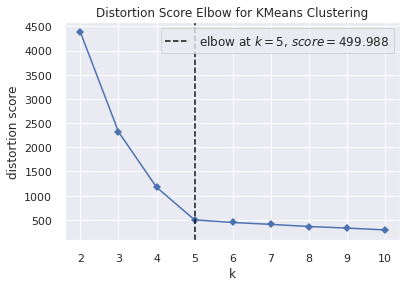

In [51]:
plot_model(model, plot = 'elbow')

From the Elbow plot we see that 5 clusters is a great value for k

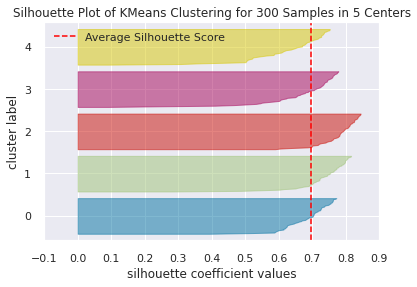

In [52]:
plot_model(model, plot = 'silhouette')

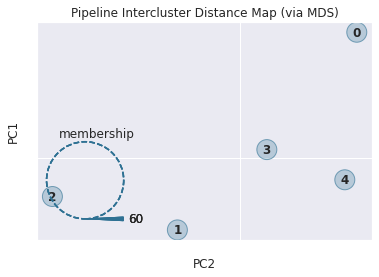

In [53]:
plot_model(model, plot = 'distance')

# Summary Notes

In this case the DB Scan Algorithm through Pycaret was not accepting the number of cluster arguments which would have been 5 so that we could get a direct comparison with K-means. But depending on if the dataset has a lot of noise or outliers DB Scan is a great algorithm for finding those outliers.

With other clustering methods like K-means pycaret offers great plotting tools to visualize clsuters with only a single line of code.

# Reference

Reference article provide template for how to calculate the DB Scan Clusters [Article](https://insaid.medium.com/clustering-using-pycaret-964650e32109)

Pycaret library [link](https://pycaret.org/clustering1/)

Performance metrics on clustering [Performance Metrics in Machine Learning ](https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6)